In [28]:
import os
import cv2
import joblib
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
joblib_in = open("D:/Documents/CVPR/Resources/face_mask/X_train.joblib","rb")
X_train = joblib.load(joblib_in)

joblib_in = open("D:/Documents/CVPR/Resources/face_mask/Y_train.joblib","rb")
Y_train = joblib.load(joblib_in)

joblib_in = open("D:/Documents/CVPR/Resources/face_mask/X_valid.joblib","rb")
X_valid = joblib.load(joblib_in)

joblib_in = open("D:/Documents/CVPR/Resources/face_mask/Y_valid.joblib","rb")
Y_valid = joblib.load(joblib_in)

joblib_in = open("D:/Documents/CVPR/Resources/face_mask/X_test.joblib","rb")
X_test = joblib.load(joblib_in)

joblib_in = open("D:/Documents/CVPR/Resources/face_mask/Y_test.joblib","rb")
Y_test = joblib.load(joblib_in)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")
print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")
print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_train= (10000, 64, 64, 3) Y_train= (10000,)
X_valid= (800, 64, 64, 3) Y_valid= (800,)
X_test= (992, 64, 64, 3) Y_test= (992,)


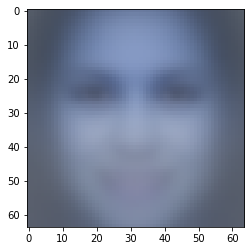

In [3]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [4]:
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

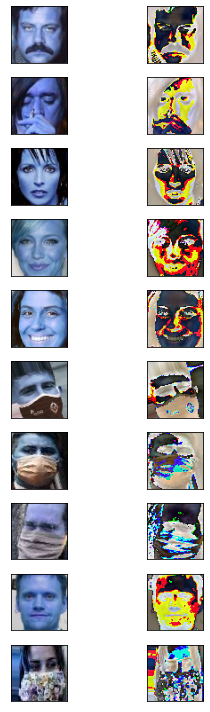

In [10]:
c = 0
plt.figure(figsize=(5,10))
for i in range(10):
    plt.subplot(10,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(10,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [19]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(64,64,3)),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(2),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 16, 16, 96)        34944     
_________________________________________________________________
activation_56 (Activation)   (None, 16, 16, 96)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 8, 8, 96)          384       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 8, 8, 256)         2973952   
_________________________________________________________________
activation_57 (Activation)   (None, 8, 8, 256)         0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 256)        

In [21]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [29]:
cb = EarlyStopping(monitor='val_loss', min_delta = 0.02, patience=3, restore_best_weights= True)
h = model.fit(x=X_train_norm, y=Y_train, epochs=20, validation_data=(X_valid_norm, Y_valid), batch_size=32, callbacks=[cb])

Epoch 1/20
313/313 [==============================] - 273s 863ms/step - loss: 0.7340 - accuracy: 0.8393 - val_loss: 0.0771 - val_accuracy: 0.9725
Epoch 2/20
313/313 [==============================] - 271s 865ms/step - loss: 0.1113 - accuracy: 0.9627 - val_loss: 0.0787 - val_accuracy: 0.9837
Epoch 3/20
313/313 [==============================] - 271s 865ms/step - loss: 0.0873 - accuracy: 0.9744 - val_loss: 0.0654 - val_accuracy: 0.9750
Epoch 4/20
313/313 [==============================] - 270s 862ms/step - loss: 0.0743 - accuracy: 0.9748 - val_loss: 0.0244 - val_accuracy: 0.9937
Epoch 5/20
313/313 [==============================] - 271s 867ms/step - loss: 0.0552 - accuracy: 0.9842 - val_loss: 0.0432 - val_accuracy: 0.9837
Epoch 6/20
313/313 [==============================] - 272s 868ms/step - loss: 0.0345 - accuracy: 0.9899 - val_loss: 0.0500 - val_accuracy: 0.9887
Epoch 7/20
313/313 [==============================] - 270s 862ms/step - loss: 0.0341 - accuracy: 0.9905 - val_loss: 0.0336 -

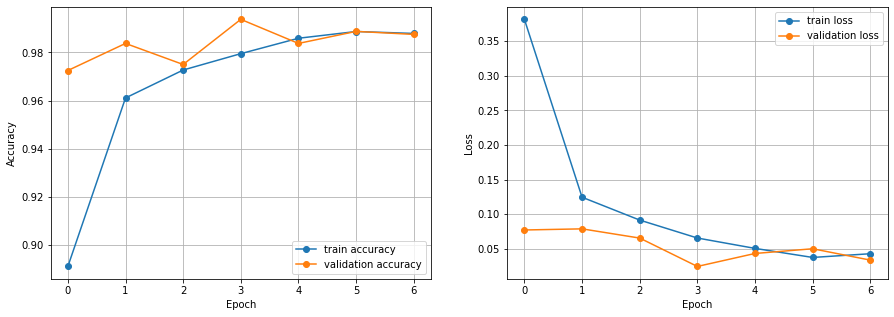

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
model.save('D:/Documents/CVPR/Resources/face_mask/Models/AlexNetOnFaceMask.h5')